### OpenCV의 이미지와 영상 처리

* Python에서 사용되는 여러 image라이브러리를 간단히 살펴보고 OpenCV와의 차이 이해
* OpenCV의 단일 이미지 처리 방식 이해 
* OpenCV의 비디오 영상 처리 방식 이해

# 아래 예제는 GPU가 필요하지 않으며 코랩 커널을 GPU로 바꿀 필요가 없습니다. 
* tensorflow와 keras 설치는 필요하지 않습니다.
* OpenCV와 기타 필요한 패키지는 이미 코랩에 설치 되어 있습니다.  

In [ ]:
hi = [[1, 2, 3], [2], [3], [4], [5]]
print(hi[:2][:-1])

[[1, 2, 3]]


#### 실습 코드를 github에서 다운로드

In [2]:
# 현재 디렉토리는 /content이며 이 디렉토리를 기준으로 실습코드와 데이터를 다운로드 합니다. 
!pwd

# 실습코드를 github에서 다운로드
!git clone https://github.com/chulminkw/DLCV.git

# DLCV 디렉토리가 Download되고 DLCV 밑에 Detection과 Segmentation 디렉토리가 있는 것을 확인
!ls -lia 
!ls -lia DLCV

/content
Cloning into 'DLCV'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 234 (delta 32), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (234/234), 142.72 MiB | 30.12 MiB/s, done.
Resolving deltas: 100% (89/89), done.
total 20
1703954 drwxr-xr-x 1 root root 4096 Apr  1 04:53 .
6948744 drwxr-xr-x 1 root root 4096 Apr  1 04:44 ..
5373967 drwxr-xr-x 4 root root 4096 Mar 25 13:38 .config
6948718 drwxr-xr-x 7 root root 4096 Apr  1 04:53 DLCV
1703955 drwxr-xr-x 1 root root 4096 Mar 25 13:38 sample_data
total 11016
6948718 drwxr-xr-x 7 root root    4096 Apr  1 04:53  .
1703954 drwxr-xr-x 1 root root    4096 Apr  1 04:53  ..
6948915 drwxr-xr-x 2 root root    4096 Apr  1 04:53  colab_tf115_modify_files
6948918 drwxr-xr-x 6 root root    4096 Apr  1 04:53  data
6948801 drwxr-xr-x 8 root root    4096 Apr  1 04:53  Detection
6948786 -rw-r--r-- 1 root root 6567662 Apr  1 04:53  DLCV

#### OpenCV 이미지 처리 이해 및 타 패키지 비교

#### PIL 패키지를 이용하여 이미지 로드하기

image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


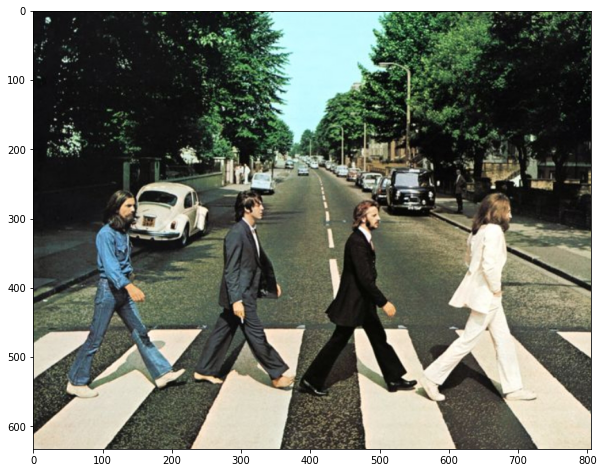

In [5]:
import matplotlib.pyplot as plt
import os
%matplotlib inline

from PIL import Image

# PIL은 oepn()으로 image file을 읽어서 ImageFile객체로 생성. 
# 코랩 버전은 상대 경로를 사용하지 않습니다. /content 디렉토리를 기준으로 절대 경로를 이용합니다. 
# default_dir 은 /content/DLCV로 지정하고 os.path.join()으로 상세 파일/디렉토리를 지정합니다. 
default_dir = '/content/DLCV'
pil_image = Image.open(os.path.join(default_dir, "data/image/beatles01.jpg"))
print('image type:', type(pil_image))

plt.figure(figsize=(10, 10))
plt.imshow(pil_image)
#plt.show()

#### skimage(사이킷이미지)로 이미지 로드 하기
* skimage는 imread()를 이용하여 RGB 원본 이미지를 RGB 형태의 넘파이 배열로 반환함.  

sk_image type: <class 'numpy.ndarray'>  sk_image shape: (633, 806, 3)


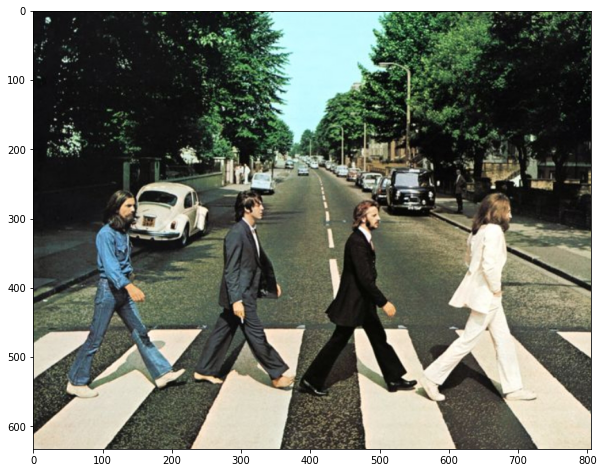

In [6]:
from skimage import io

#skimage는 imread()를 이용하여 image를 numpy 배열로 반환함. 
sk_image = io.imread(os.path.join(default_dir, "data/image/beatles01.jpg"))
print('sk_image type:', type(sk_image), ' sk_image shape:', sk_image.shape)

plt.figure(figsize=(10, 10))
plt.imshow(sk_image)
#plt.show()

#### OpenCV로 이미지 로드하기
* OpenCV는 imread()를 이용하여 원본 RGB 이미지를 BGR 형태의 넘파이 배열로 반환함.  
* OpenCV의 imwrite()를 이용한다면 BGR 형태의 이미지 배열을 파일에 기록할 때 다시 RGB형태로 변환하므로 사용자는 RGB->BGR->RGB 변환에 신경쓰지 않아도 됨. 

cv_image type: <class 'numpy.ndarray'>  cv_image shape: (633, 806, 3)


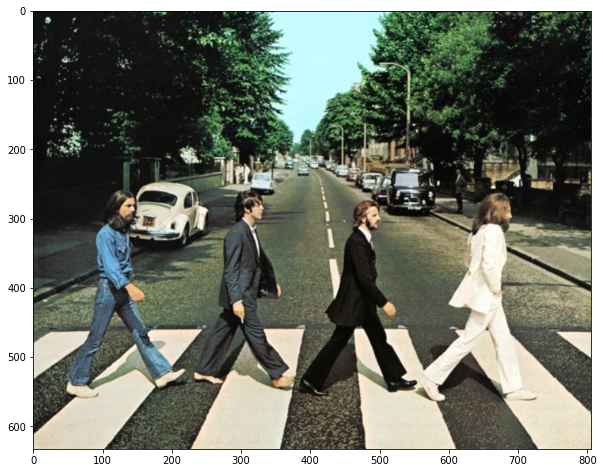

In [7]:
import cv2

cv2_image = cv2.imread(os.path.join(default_dir, "data/image/beatles01.jpg"))
cv2.imwrite(os.path.join(default_dir, "data/output/beatles02_cv.jpg"), cv2_image)
print('cv_image type:', type(cv2_image), ' cv_image shape:', cv2_image.shape)

plt.figure(figsize=(10, 10))
img = plt.imread(os.path.join(default_dir, "data/output/beatles02_cv.jpg"))
plt.imshow(img)
#plt.show()


#### OpenCV의 imread()로 반환된 BGR 이미지 넘파이 배열을 그대로 시각화 하기
* OpenCV의 imread()는 RGB를 BGR로 변환하므로 원하지 않는 이미지가 출력됨

In [ ]:
cv2_image = cv2.imread(os.path.join(default_dir, "data/image/beatles01.jpg"))

plt.figure(figsize=(10, 10))
plt.imshow(cv2_image)
plt.show()

In [ ]:
sk_image = io.imread(os.path.join(default_dir, "data/image/beatles01.jpg"))
print(sk_image.shape)
sk_image[:, :, 0]

In [ ]:
cv2_image = cv2.imread(os.path.join(default_dir, "data/image/beatles01.jpg"))
print(type(cv2_image))
print(cv2_image.shape)
cv2_image[:, :, 0]

In [ ]:
cv2_image[:, :, 2]

In [ ]:
cv2_image = cv2.imread(os.path.join(default_dir, "data/image/beatles01.jpg"))
draw_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(draw_image)
plt.show()

#### OpenCV 영상처리
* OpenCV는 간편하게 비디오 영상처리를 할 수 있는 API를 제공
* VideoCapture 객체는 Video Streaming을 Frame 별로 Capture하여 처리할 수 있는 기능 제공
* VideoWriter 객체는 VideoCapture로 읽어들인 Frame을 동영상으로 Write하는 기능 제공

In [3]:
# 코랩 버전은 아래 코드를 이용합니다.
# 코랩 버전은 용량 문제로 인해 Night and Day를 browser로 보여줄때 커널이 종료됩니다. 보다 작은 크기인 John Wick으로 대체
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/DLCV/data/video/John_Wick_small.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
# 코랩 버전에서 위의 sample은 John wick이지만 실제 Video 처리는 강의와 동일하게 Night and Day로 수행. 

import cv2

default_dir = '/content/DLCV'
video_input_path = os.path.join(default_dir, 'data/video/Night_Day_Chase.mp4')
# linux에서 video output의 확장자는 반드시 avi 로 설정 필요. 
video_output_path = os.path.join(default_dir, 'data/output/Night_Day_Chase_output.avi')

cap = cv2.VideoCapture(video_input_path)
# Codec은 *'XVID'로 설정. 
codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))) #(200, 400)
vid_fps = cap.get(cv2.CAP_PROP_FPS )
    
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size) 

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt, 'FPS:', round(vid_fps), 'Frame 크기:', vid_size)

총 Frame 갯수: 1383 FPS: 28 Frame 크기: (1216, 516)


In [9]:
import time

green_color=(0, 255, 0)
red_color=(0, 0, 255)

start = time.time()
index=0
while True:
    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break
    index += 1
    print('frame :', index, '처리 완료')
    cv2.rectangle(img_frame, (300, 100, 800, 400), color=green_color, thickness=2)
    caption = "frame:{}".format(index)
    cv2.putText(img_frame, caption, (300, 95), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 1)
    
    vid_writer.write(img_frame)

print('write 완료 시간:', round(time.time()-start,4))
vid_writer.release()
cap.release()   

frame : 1 처리 완료
frame : 2 처리 완료
frame : 3 처리 완료
frame : 4 처리 완료
frame : 5 처리 완료
frame : 6 처리 완료
frame : 7 처리 완료
frame : 8 처리 완료
frame : 9 처리 완료
frame : 10 처리 완료
frame : 11 처리 완료
frame : 12 처리 완료
frame : 13 처리 완료
frame : 14 처리 완료
frame : 15 처리 완료
frame : 16 처리 완료
frame : 17 처리 완료
frame : 18 처리 완료
frame : 19 처리 완료
frame : 20 처리 완료
frame : 21 처리 완료
frame : 22 처리 완료
frame : 23 처리 완료
frame : 24 처리 완료
frame : 25 처리 완료
frame : 26 처리 완료
frame : 27 처리 완료
frame : 28 처리 완료
frame : 29 처리 완료
frame : 30 처리 완료
frame : 31 처리 완료
frame : 32 처리 완료
frame : 33 처리 완료
frame : 34 처리 완료
frame : 35 처리 완료
frame : 36 처리 완료
frame : 37 처리 완료
frame : 38 처리 완료
frame : 39 처리 완료
frame : 40 처리 완료
frame : 41 처리 완료
frame : 42 처리 완료
frame : 43 처리 완료
frame : 44 처리 완료
frame : 45 처리 완료
frame : 46 처리 완료
frame : 47 처리 완료
frame : 48 처리 완료
frame : 49 처리 완료
frame : 50 처리 완료
frame : 51 처리 완료
frame : 52 처리 완료
frame : 53 처리 완료
frame : 54 처리 완료
frame : 55 처리 완료
frame : 56 처리 완료
frame : 57 처리 완료
frame : 58 처리 완료
frame : 59 처리 완료
frame 

In [10]:
## colab 버전은 영상 파일을 google drive에서 download 해야 합니다. 이를 위해 google drive를 colab에 mount 수행. 
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
## colab 버전은 Object Detection 적용된 영상 파일을 google drive에서 download 해야 합니다. 
## My Drive 디렉토리 이름에 공란이 있으므로 ' '로 묶습니다. 
!cp /content/DLCV/data/output/Night_Day_Chase_output.avi '/content/gdrive/MyDrive/Night_Day_Chase_output.avi'